# Battery quesions



In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
import factor_analyzer as fact
import missingno as msngo
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [45]:
df = pd.read_csv('./bfi.csv')
df.head(5)


,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17



## Preprocessing



In [46]:
df.drop(df.columns[0], axis=1, inplace=True)
df

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,...,NaN,1.0,6.0,1,6.0,6.0,1.0,1,3.0,19
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,...,3.0,3.0,6.0,3,5.0,4.0,2.0,1,4.0,27
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


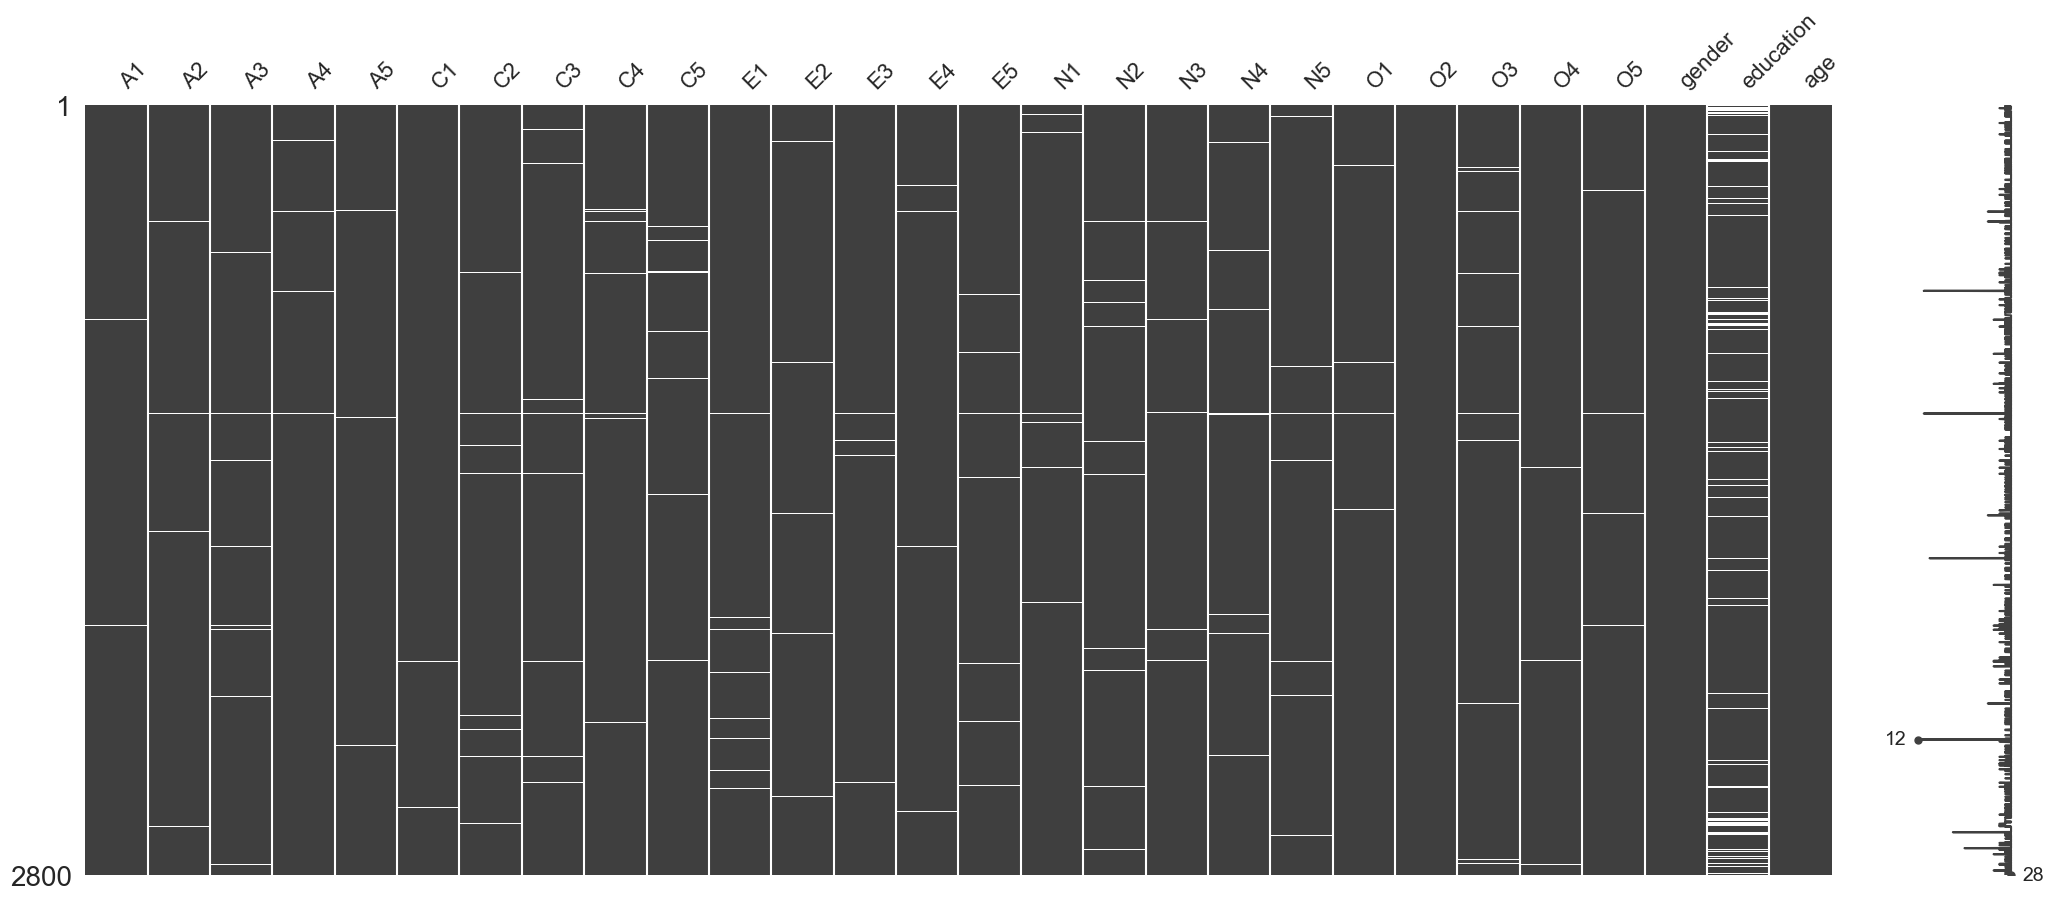

In [ ]:
msngo.matrix(df); # searching missing values

As shown in the figure above the ``education`` feature shows the mayority of data which is nan.

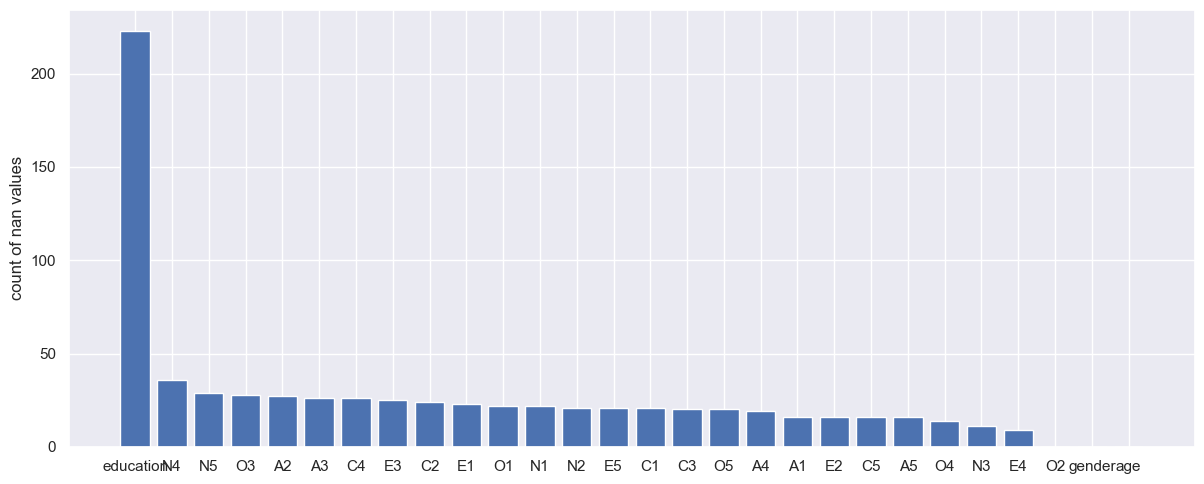

In [48]:
nancount = df.isna().sum().sort_values(ascending=False)
fig,ax = plt.subplots(figsize=(12,5))
ax.bar(nancount.index,nancount.loc[:])

# ax.set_xticks(rotation=35,ha='right')
plt.tight_layout()
ax.set_ylabel('count of nan values');


Generating dataframe without nan values

In [49]:
df.dropna(inplace=True)
df.head(5)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68



## Description


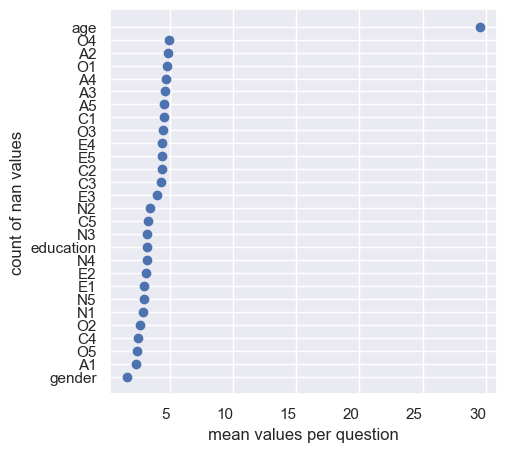

In [50]:
mean = df.mean().sort_values(ascending=True)
sns.set()
fig,ax2= plt.subplots(figsize=(5,5))
ax2.scatter(mean.loc[:],mean.index)

plt.xticks(rotation=0,ha='right')
# ax2.tight_layout()
ax2.set_ylabel('count of nan values');
ax2.set_xlabel('mean values per question');



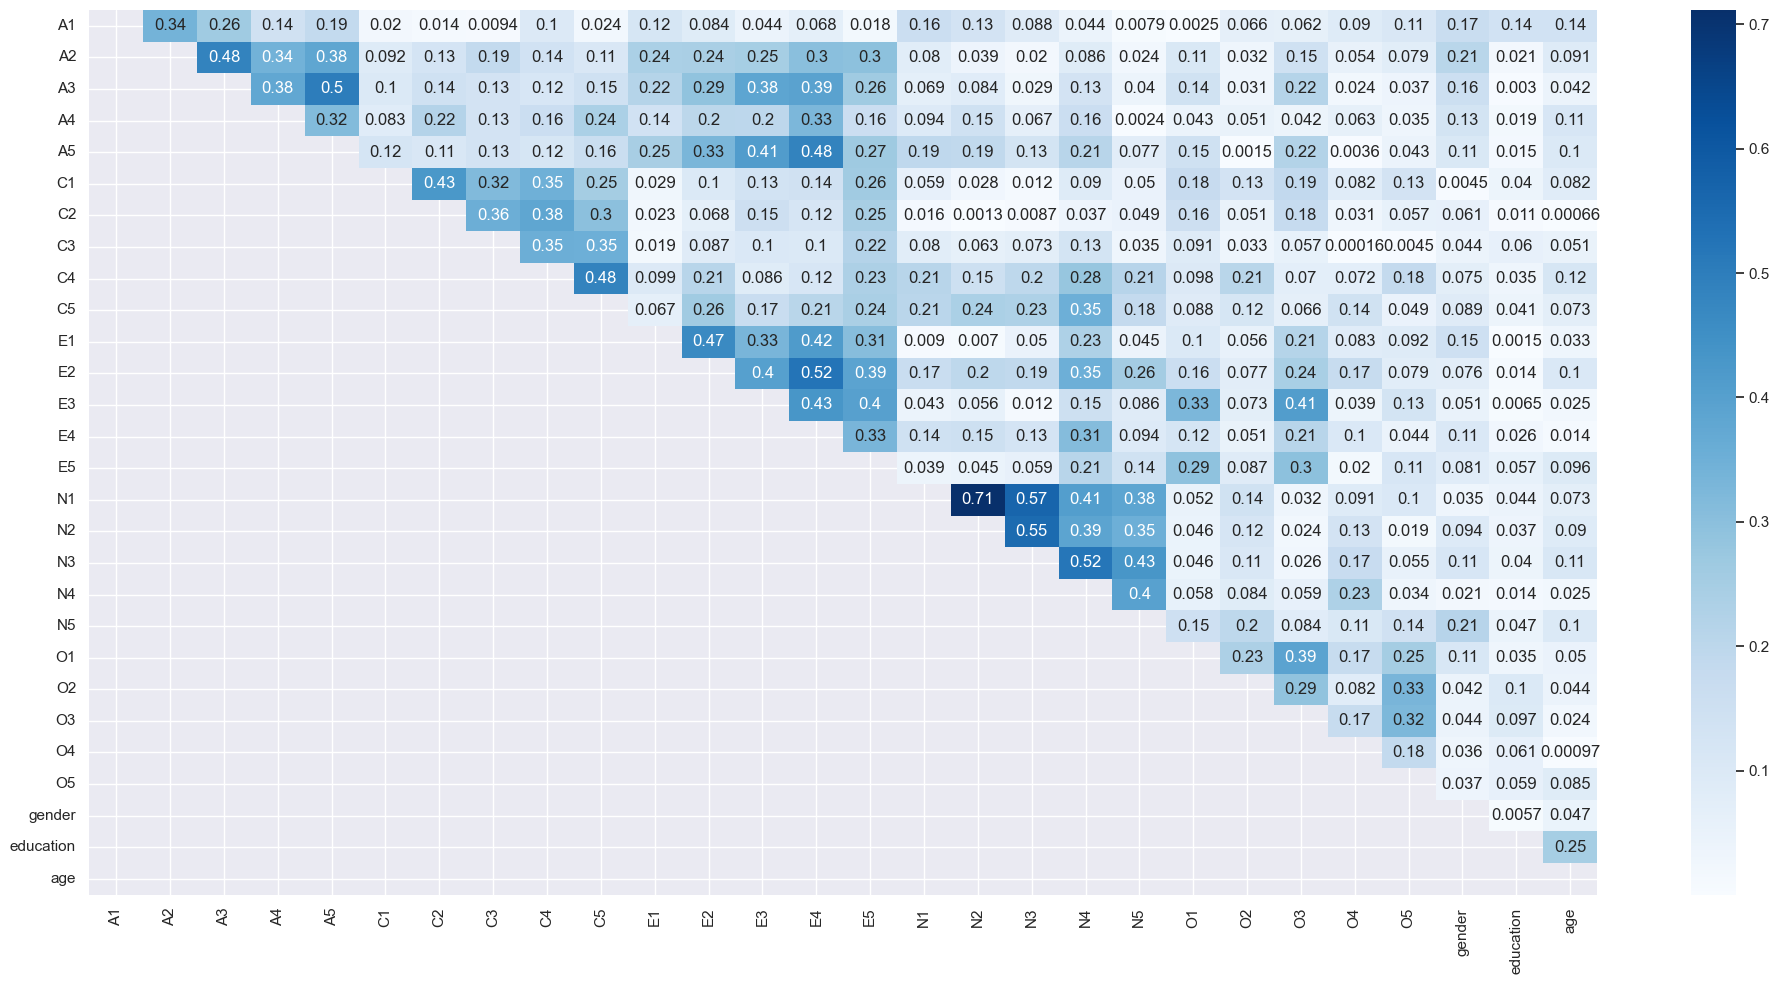

In [51]:
fig3, ax3 =plt.subplots(figsize=(20,10))
sns.heatmap(df.corr().abs(), cmap='Blues', annot=True, mask=np.tril(df.corr()))
plt.tight_layout()

<!-- Preguntas tipo ``N`` son las que contienen mayo correlación.  Se ve que existen cumulos (agrupamientos) de correlacion entre las preguntas con los mismos caracteres a lo largo de la diagonal. También las preguntas tipo ``A`` y las tipo ``E`` tienen una correlacion que sobresale pero no llega a valores altos. Por último la pregunta ``E5`` tiene  una correlacion las preguntas de su grupo y las tipo ``A`` y ``B``. -->

Questions of type ``N`` are those with more correlation. As can be notice there are clusters of correlations between questions with the same type along the diagonal. The questions type ``A``  and ``E`` have a correlation that stands out but its not the more prominent when looking the whole dataset correlation. 


## Extraction of factors



### Barlett test

In [52]:
chi2, pvalue = fact.calculate_bartlett_sphericity(df)

print('The parameters of sphericity are :')
print('Chi^2:', chi2)
print('p-value:', pvalue)

The parameters of sphericity are :
Chi^2: 17331.21102101058
p-value: 0.0


The null Hyphothesis, $H_0$, is regected because the **p-value** $<$ 0.05. Thus the correlation matrix is not equal than the identity matrix. This means we can proceed with the analysis.



### Sample test Kaiser-Meyer-Olkin (KMO)

In [53]:
kmo    = fact.calculate_kmo(df)[0]
reject = [n for n,i in enumerate(kmo) if i<0.7]
rej_columns = list(df.columns[reject])
df2     = df.drop(rej_columns, axis=1)[:]
display(f'The rejected columns by KMO test are, {rej_columns[0], rej_columns[1]}',df2)

"The rejected columns by KMO test are, ('education', 'age')"

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0,2
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0,1
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0,1
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0,1
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,5.0,5.0,5.0,6.0,5.0,6.0,6.0,2.0,4.0,5.0,...,4.0,5.0,3.0,4.0,4.0,5,5.0,4.0,4.0,2
2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,...,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0,2
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0,2
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0,1


**Determination of the number of factors that we need...**

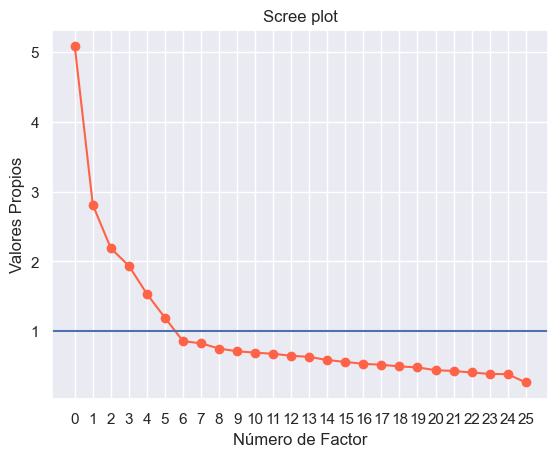

In [54]:
factorize = fact.FactorAnalyzer(n_factors=10, rotation=None)
factorize.fit(df2)
factor_eigen = factorize.get_eigenvalues()[0]
plt.plot(range(len(factor_eigen)), factor_eigen, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
# visualizamos el criterio de corte
plt.axhline(1)
plt.xticks(range(len(factor_eigen)))
plt.title("Scree plot");

**Refactorazing**

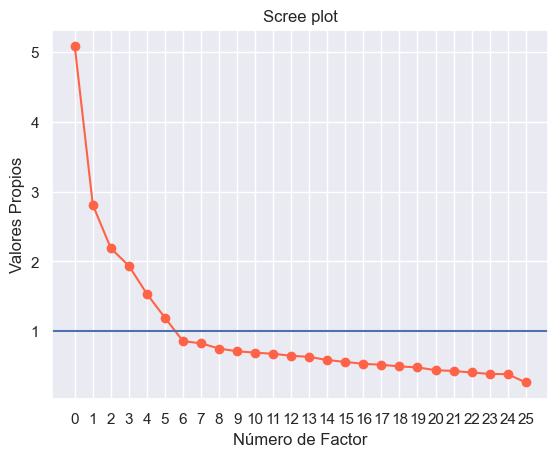

In [89]:
factorize = fact.FactorAnalyzer(n_factors=4, rotation=None)
factorize.fit(df2)
factor_eigen = factorize.get_eigenvalues()[0]
plt.plot(range(len(factor_eigen)), factor_eigen, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
# visualizamos el criterio de corte
plt.axhline(1)
plt.xticks(range(len(factor_eigen)))
plt.title("Scree plot");

**Extrancting loads $\lambda$**

In [90]:
fact_loads = factorize.loadings_ 
factorlist = ['Factor {}'.format(i+1) for i in range(fact_loads.shape[1])]
factor_loadings = pd.DataFrame(fact_loads, index=df2.columns, columns=factorlist)
factor_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x, 2)))


,Factor 1,Factor 2,Factor 3,Factor 4
A1,,,,
A2,0.45,,,
A3,0.52,,,
A4,0.4,,,
A5,0.57,,,
C1,,,0.43,
C2,,,0.42,
C3,,,,
C4,,,,
C5,,,,


The loads greater than 0.4 show that the majority of the ``A`` questions and ``E`` ones can be recognized as the same category. In the Factor 2 the ``N`` cases is more related with other kind of category; the same can be infered with the ``C`` questions.

Text(0, 0.5, 'Factor 2: 0.09')

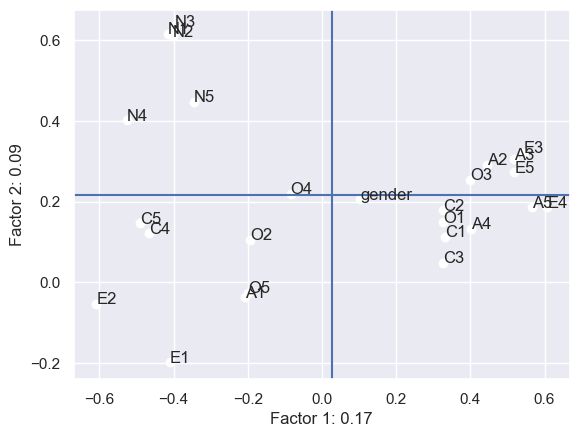

In [91]:
factor_var = factorize.get_factor_variance()
factor_var = pd.DataFrame(factor_var, columns=factor_loadings.columns, index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])

# cruzamos ambos factores
plt.plot(factor_loadings['Factor 1'], factor_loadings['Factor 2'],'o',color='white')

# Para cada elemento en los factores
for i, txt in enumerate(factor_loadings.index):
    # anotemos el nombre de la variable
    plt.annotate(txt, (factor_loadings['Factor 1'][i], factor_loadings['Factor 2'][i]))
    
# Grafiquemos la media de ambos factores
plt.axvline(factor_loadings['Factor 1'].mean())
plt.axhline(factor_loadings['Factor 2'].mean())
# Reportemos la varianza de cada dimensión
plt.xlabel('Factor 1: {}'.format(round(factor_var['Factor 1'][1], 2)))
plt.ylabel('Factor 2: {}'.format(round(factor_var['Factor 2'][1], 2)))


In [92]:
display(factor_var)

,Factor 1,Factor 2,Factor 3,Factor 4
SS Loadings,4.496737,2.273613,1.541478,1.298063
Proportion Var,0.172951,0.087447,0.059288,0.049925
Cumulative Var,0.172951,0.260398,0.319686,0.369611


Here the questions that are general for all the others are approached to the center of the plot.



## Modeling of the factors
$$\overline{y} = \beta_0 + \beta_1 \cdot \text{gender}+\beta_2\cdot\text{education}+\beta_1\cdot\text{age}+\epsilon_1$$

* $\beta_i$ are the loads associated to those questions

* $\epsilon_i$ is the error

## Score extraction

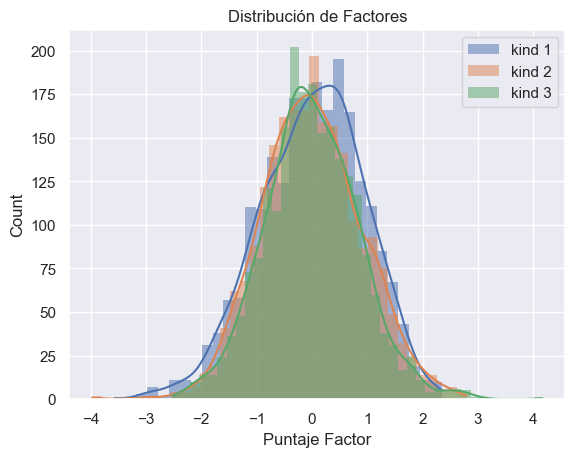

In [93]:
e_factor_scores = pd.DataFrame(factorize.transform(df2),columns=factor_loadings.columns)

ax = plt.axes()

[sns.histplot(e_factor_scores['Factor {}'.format(i+1)],kde=True,ax=ax,label=kk ,linewidth=0) for i,kk in zip(range(3),['kind 1','kind 2', 'kind 3'])]
# sns.histplot(e_factor_scores['Factor 1'],kde=True,ax=ax, linewidth=0)
ax.set_title('Distribución de Factores')
ax.set_xlabel('Puntaje Factor')
plt.legend()
plt.show()


In [94]:
def model_new(gg,ee,aa,b0,b1,b2,error):
    return b0+b1*gg+b2*ee+b1*aa+error
df

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,5.0,5.0,5.0,6.0,5.0,6.0,6.0,2.0,4.0,5.0,...,3.0,4.0,4.0,5,5.0,4.0,4.0,2,3.0,22
2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,...,5.0,6.0,6.0,1,4.0,5.0,2.0,2,4.0,24
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


In [97]:
factorize2   = fact.FactorAnalyzer(n_factors=7, rotation=None)
factorize2.fit(df)
fact_loads2 = factorize2.loadings_ 
display(fact_loads2.shape)
factorlist2 = ['Factor {}'.format(i+1) for i in range(fact_loads2.shape[1])]
factor_loadings2 = pd.DataFrame(fact_loads2, index=df.columns, columns=factorlist2)

factor_loadings2

(28, 7)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
A1,-0.228926,-0.039860,0.141679,0.037083,-0.488949,0.175405,0.136368
A2,0.458122,0.305975,-0.194571,0.087366,0.329758,-0.028380,-0.063794
A3,0.523387,0.315413,-0.244366,0.037368,0.231106,0.140875,-0.010044
A4,0.403030,0.132965,-0.178791,0.232865,0.144552,0.073128,0.038414
A5,0.569304,0.189715,-0.248632,-0.025059,0.137948,0.158074,0.080007
C1,0.328468,0.105603,0.421849,0.198635,-0.018923,0.073718,0.073467
C2,0.323855,0.174484,0.409861,0.367001,0.000248,0.181153,0.025693
C3,0.323297,0.043912,0.277260,0.360981,0.017594,0.048820,0.065756
C4,-0.473758,0.128799,-0.392343,-0.342568,-0.009099,0.192292,0.153602
C5,-0.486308,0.145643,-0.201060,-0.348231,0.111461,0.039872,0.075109


In [105]:
# education_loads = factor_loadings2.loc['education'].agg(np.mean)
# gender_loads    = factor_loadings2.loc['gender'].agg(np.mean)
# age_loads       = factor_loadings2.loc['age'].agg(np.mean)
